In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

var_descriptions = {
    "a": "Size of the orbit (km)",
    "e": "Shape of the orbit (0 = circle, 1 = ellipse)",
    "q": "Closest distance from sun (perihelion) in orbit (km)",
    "ad": "Farthest distance from sun (aphelion) in orbit (km)",
    "per_y": "Orbital period (years)",
    "data_arc": "Data arc-span (d)",
    "n_obs_used": "# of observations used",
    "H": "Asteroid’s absolute magnitude",
    "albedo": "Geometric albedo (brightness ratio)",
    "moid": "Earth Minimum Orbit Intersection Distance (km): To classify hazardous objects",
    "n": "Mean motion (deg/day): Angular speed necessary for one complete orbit",
    "per": "Orbital period (days)"}


In [8]:
df = pd.read_csv('Asteroid_au_to_km.csv', header=0, index_col=0)

# Numeric columns
numerics = df.select_dtypes(include=np.number)

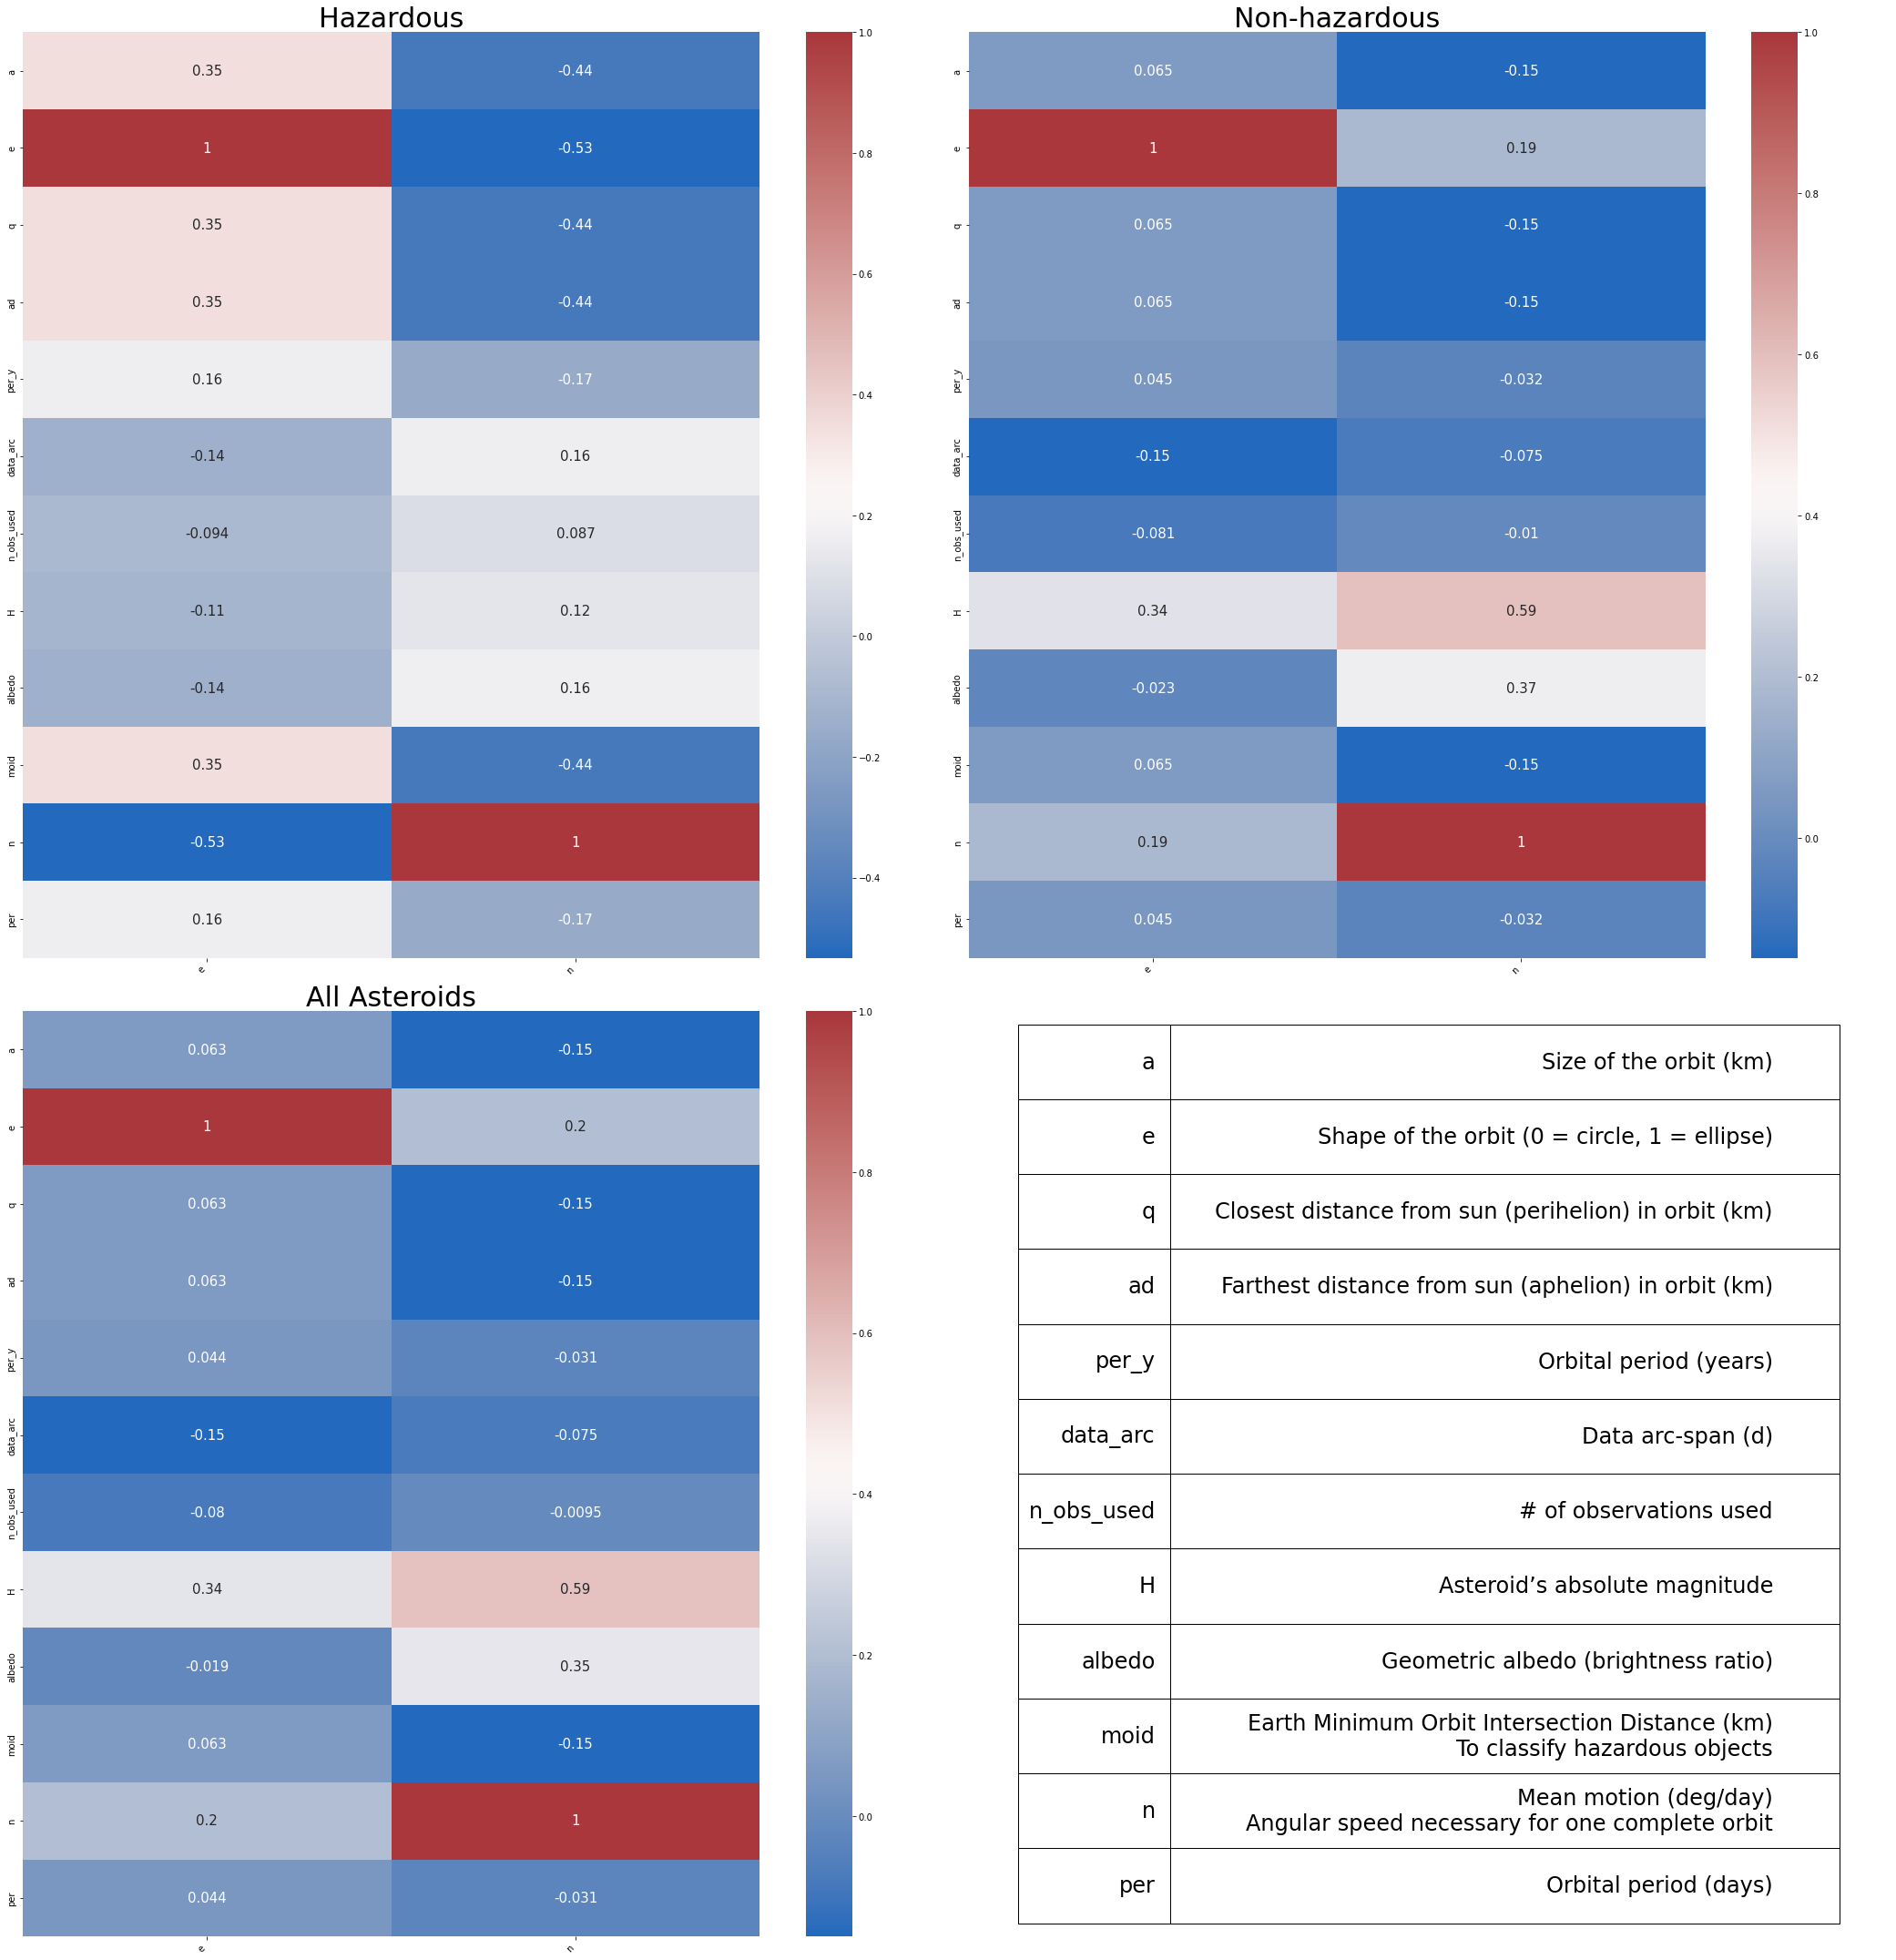

In [11]:
# Heatmap plots
fig_corr, ax_corr = plt.subplots(2, 2, figsize=(30, 30))
ax_corr[0, 0].set_title('Hazardous', fontsize=30)
ax_corr[0, 1].set_title('Non-hazardous', fontsize=30)
ax_corr[1, 0].set_title('All Asteroids', fontsize=30)

# Variable descriptions
ax_corr[1, 1].set_axis_off()
des_strings = np.array([[k,v.replace(': ', '\n')] for k, v in var_descriptions.items()])
table = ax_corr[1,1].table(cellText=des_strings, fontsize=30, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(24)
table.auto_set_column_width(col=list(range(2)))
table.scale(1,5)
    
assert 'pha' in df.columns
# PHA values
pha_df = numerics.loc[df['pha'] == 'Y']
pha_corr = pha_df.corr()
# Non-PHA values
n_pha_df = numerics.loc[df['pha'] != 'Y']
n_pha_corr = n_pha_df.corr()

# Removal of non-relevant or uncorrelated variables
main_mask = np.eye(len(pha_corr), dtype=bool)
to_drop = ((pha_corr.mask(main_mask).abs().fillna(0) < 0.3) &
           (n_pha_corr.mask(main_mask).abs().fillna(0) < 0.3)).all()
numerics.drop(numerics.columns[to_drop], axis=1, inplace=True)
main_cols = ['e', 'n']

# Separation of PHA and non-PHA
pha_df, n_pha_df = numerics.loc[df.loc[:, 'pha'] == 'Y'], numerics.loc[df.loc[:, 'pha'] != 'Y']
# Correlation matrices
pha_corr, n_pha_corr = pha_df.corr().loc[:, main_cols], n_pha_df.corr().loc[:, main_cols]
correlation = numerics.corr().loc[:, main_cols]

# Heatmap for Hazardous asteroids
pha_ax = sns.heatmap(pha_corr, cmap='vlag', ax=ax_corr[0, 0], annot=True, annot_kws={"size": 15})
pha_ax.set_xticklabels(pha_ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Heatmap for Non-hazardous asteroids
n_pha_ax = sns.heatmap(n_pha_corr, cmap='vlag', ax=ax_corr[0, 1], annot=True, annot_kws={"size": 15})
n_pha_ax.set_xticklabels(n_pha_ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Heatmap for all asteroids
corr_ax = sns.heatmap(correlation, cmap='vlag', ax=ax_corr[1, 0], annot=True, annot_kws={"size": 15})
corr_ax.set_xticklabels(corr_ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig_corr.tight_layout()

plt.show()